# Brain tumor detection using VGG16
---

Nombre total d'images chargées : 130


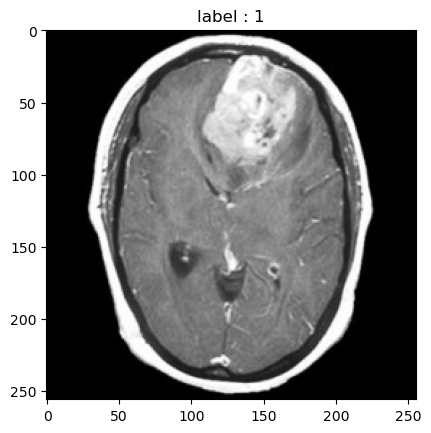

In [1]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

from src.load_data import *
from src.img_processing import *
from src.convert import *
from src.img_processing import process_folder_for_cropping, check_folder_cropping_quality

In [2]:
# Configure image size by pixels
height = 256 #(px)
width = 256 #(px)

train_path_raw_yes = "data/train/yes/"
train_path_raw_no = "data/train/no/"

train_path_yes= "processed_data/train/yes/" # output folder for train data
train_path_no = "processed_data/train/no/" # output folder for train data

train_path = "processed_data/train" # output folder for train data

test_path_raw_no = "data/test/yes/"
test_path_raw_yes = "data/test/no/"

test_path_yes = "processed_data/test/yes/" # output folder for test data
test_path_no = "processed_data/test/no/" # output folder for test data

test_path = "processed_data/test/" # output folder for test data

val_path_raw_yes = "data/val/yes/"
val_path_raw_no = "data/val/no/"   

val_path_yes = "processed_data/val/yes/" # output folder for val data
val_path_no = "processed_data/val/no/" # output folder for val data

val_path = "processed_data/val" # output folder for val data

In [3]:
process_folder_for_cropping(train_path_raw_yes, train_path_raw_yes, width, height)
process_folder_for_cropping(train_path_raw_no, train_path_raw_no, width, height)

process_folder_for_cropping(test_path_raw_yes, test_path_yes, width, height)
process_folder_for_cropping(test_path_raw_no, test_path_no, width, height) 

process_folder_for_cropping(val_path_raw_yes, val_path_yes, width, height)
process_folder_for_cropping(val_path_raw_no, val_path_no, width, height)

Processed and saved: data/train/yes/Y1.jpg
Processed Y1.jpg
Processed and saved: data/train/yes/Y10.jpg
Processed Y10.jpg
Processed and saved: data/train/yes/Y101.jpg
Processed Y101.jpg
Processed and saved: data/train/yes/Y102.jpg
Processed Y102.jpg
Processed and saved: data/train/yes/Y103.jpg
Processed Y103.jpg
Processed and saved: data/train/yes/Y104.jpg
Processed Y104.jpg
Processed and saved: data/train/yes/Y105.jpg
Processed Y105.jpg
Processed and saved: data/train/yes/Y106.jpg
Processed Y106.jpg
Processed and saved: data/train/yes/Y107.jpg
Processed Y107.jpg
Processed and saved: data/train/yes/Y108.jpg
Processed Y108.jpg
Processed and saved: data/train/yes/Y11.jpg
Processed Y11.jpg
Processed and saved: data/train/yes/Y12.jpg
Processed Y12.jpg
Processed and saved: data/train/yes/Y13.jpg
Processed Y13.jpg
Processed and saved: data/train/yes/Y14.jpg
Processed Y14.jpg
Processed and saved: data/train/yes/Y15.jpg
Processed Y15.jpg
Processed and saved: data/train/yes/Y153.jpg
Processed Y

In [4]:
test_path = "processed_data/test/"  # Adjusted path for processed data
images, labels = load_data(test_path)

print("Total number of images loaded:", len(images))
print("Total number of labels loaded:", len(labels))


Total number of images loaded: 65
Total number of labels loaded: 65


Nombre total d'images chargées : 65


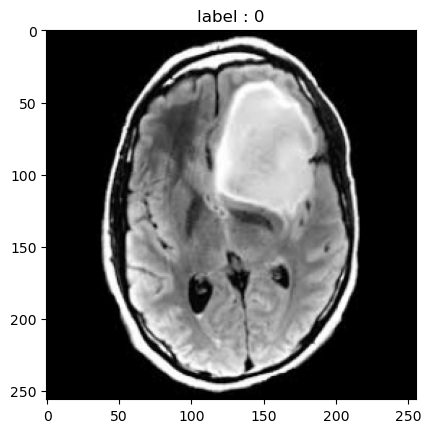

In [5]:
load_data(test_path)
plt.imshow(images[12])
plt.title(f"label : {labels[12]}")

print("Nombre total d'images chargées :", len(images))
# print("Nombre total de labels chargés :", len(labels))

In [6]:
# Charger les données de test
test_images, test_labels = load_data(test_path)

In [7]:
# Créer un modèle VGG-16 pré-entraîné (ne pas inclure la couche dense finale)
base_model = VGG16(include_top=False, input_shape=(224, 224, 3))

NUM_CLASSES = 1

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='sigmoid'))

# Figer les poids du VGG
model.layers[0].trainable = False

# Compiler le modèle
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

# Afficher la structure du modèle
model.summary()

# Créer un générateur d'images pour la data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

# Ajuster le générateur aux données d'entraînement
datagen.fit(images)

# Entraîner le modèle avec l'augmentation de données
model.fit(datagen.flow(images, labels, batch_size=32),
          epochs=10,
          steps_per_epoch=len(images) // 32,
          validation_data=(test_images, test_labels))

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
